# **Import Library**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# **Dataset load**

In [2]:
df = pd.read_csv("salaries.csv")
df.head()

,company,job,degree,salary_more_then_100k
0,google,sales executive,bachelors,0
1,google,sales executive,masters,0
2,google,business manager,bachelors,1
3,google,business manager,masters,1
4,google,computer programmer,bachelors,0


In [3]:
df.shape

(16, 4)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   company                16 non-null     object
 1   job                    16 non-null     object
 2   degree                 16 non-null     object
 3   salary_more_then_100k  16 non-null     int64 
dtypes: int64(1), object(3)
memory usage: 644.0+ bytes


In [5]:
df.isnull().sum()

company                  0
job                      0
degree                   0
salary_more_then_100k    0
dtype: int64

# **Visualize the Data**

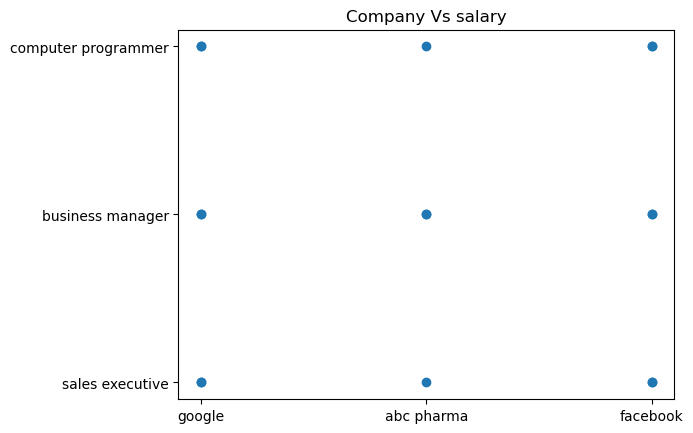

In [6]:
plt.scatter(df['company'], df['job'])
plt.title('Company Vs salary')
plt.show()

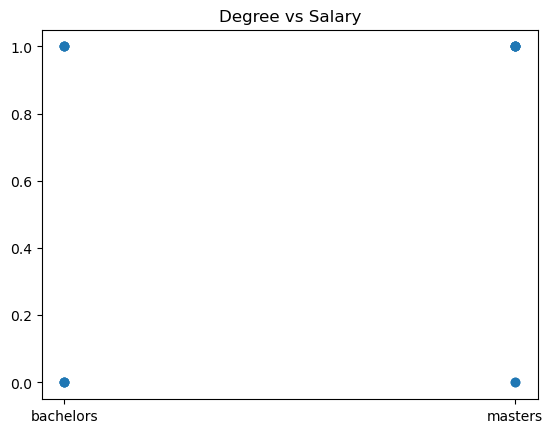

In [7]:
plt.scatter(df['degree'], df['salary_more_then_100k'])
plt.title('Degree vs Salary')
plt.show()

# **Extract Columns**

In [8]:
X = df.iloc[:,:3]
y = df.iloc[:,-1]

In [9]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,
                                                test_size=0.2,
                                                random_state=42)
X_train.shape,y_test.shape,y_train.shape,y_test.shape

((12, 3), (4,), (12,), (4,))

In [10]:
X_train

,company,job,degree
13,facebook,business manager,masters
11,facebook,sales executive,masters
8,abc pharma,business manager,bachelors
9,abc pharma,business manager,masters
2,google,business manager,bachelors
15,facebook,computer programmer,masters
4,google,computer programmer,bachelors
7,abc pharma,computer programmer,bachelors
10,facebook,sales executive,bachelors
12,facebook,business manager,bachelors


In [11]:
y_train

13    1
11    1
8     0
9     1
2     1
15    1
4     0
7     0
10    1
12    1
3     1
6     0
Name: salary_more_then_100k, dtype: int64

In [12]:
from sklearn.preprocessing import LabelEncoder

# Label Encoding each column individually
LE_Company = LabelEncoder()
X_train['company'] = LE_Company.fit_transform(X_train['company'])
X_test['company'] = LE_Company.transform(X_test['company'])

LE_Job = LabelEncoder()
X_train['job'] = LE_Job.fit_transform(X_train['job'])
X_test['job'] = LE_Job.transform(X_test['job'])

LE_Degree = LabelEncoder()
X_train['degree'] = LE_Degree.fit_transform(X_train['degree'])
X_test['degree'] = LE_Degree.transform(X_test['degree'])

In [13]:
X_train

,company,job,degree
13,1,0,1
11,1,2,1
8,0,0,0
9,0,0,1
2,2,0,0
15,1,1,1
4,2,1,0
7,0,1,0
10,1,2,0
12,1,0,0


In [14]:
X_test

,company,job,degree
0,2,2,0
1,2,2,1
5,2,1,1
14,1,1,0


# **Model fit**

In [15]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier()
DT.fit(X_train,y_train)

DecisionTreeClassifier()

In [16]:
# predict
y_pred = DT.predict(X_test)
y_pred

array([0, 0, 0, 1], dtype=int64)

In [17]:
# Accuracy (R² Score)
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

Model Accuracy: 0.75


# **Predict**

In [18]:
user_input = [[2, 0, 1]]
# user_input = [[2, 1, 0]]

# Predict salary_more_then_100k
prediction = DT.predict(user_input)

if prediction[0] == 1:
    print("Prediction: Salary is more than 100k")
else:
    print("Prediction: Salary is NOT more than 100k")

Prediction: Salary is more than 100k


In [19]:
# Save